## Import the libraries and Import the CSV file from the Cleaning phase

In [1]:
from functools import reduce
import numpy as np
import pandas as pd
import re

In [2]:
df_analysis = pd.read_csv("/home/carolina/Desktop/IRONHACK/Project files/clean_df_attacks.csv", encoding="latin-1")

In [46]:
display(df_analysis.head(15))
df_analysis.shape

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species,Decada,Nº of Cases
0,2018.0,Unprovoked,USA,Treading water,F,Teen (1 - 19),N,Not Available,2010,1
1,2018.0,Not Available,USA,Surfing,M,Adult (30 - 59),N,Not Available,2010,1
2,2018.0,Unprovoked,AUSTRALIA,Surfing,M,Not Available,N,Not Available,2010,1
3,2018.0,Provoked,MEXICO,Diving,M,Not Available,N,Tiger Shark,2010,1
4,2018.0,Unprovoked,AUSTRALIA,Surfing,M,Not Available,N,Not Available,2010,1
5,2018.0,Unprovoked,BRAZIL,Swimming,M,Teen (1 - 19),Y,Tiger Shark,2010,1
6,2018.0,Unprovoked,USA,Fishing,M,Adult (30 - 59),N,Not Available,2010,1
7,2018.0,Unprovoked,USA,Treading water,M,Teen (1 - 19),N,Bull Shark,2010,1
8,2018.0,Unprovoked,USA,Treading water,M,Teen (1 - 19),N,Not Available,2010,1
9,2018.0,Provoked,AUSTRALIA,Interacting with sharks,M,Adult (30 - 59),N,Not Available,2010,1


(3732, 10)

## Insert the column Nº of cases, so we can sum up on the analysis

In [4]:
df_analysis["Nº of Cases"] = 1

In [5]:
df_analysis.head(15)

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species,Decada,Nº of Cases
0,2018.0,Unprovoked,USA,Treading water,F,Teen (1 - 19),N,Not Available,2010,1
1,2018.0,Not Available,USA,Surfing,M,Adult (30 - 59),N,Not Available,2010,1
2,2018.0,Unprovoked,AUSTRALIA,Surfing,M,Not Available,N,Not Available,2010,1
3,2018.0,Provoked,MEXICO,Diving,M,Not Available,N,Tiger Shark,2010,1
4,2018.0,Unprovoked,AUSTRALIA,Surfing,M,Not Available,N,Not Available,2010,1
5,2018.0,Unprovoked,BRAZIL,Swimming,M,Teen (1 - 19),Y,Tiger Shark,2010,1
6,2018.0,Unprovoked,USA,Fishing,M,Adult (30 - 59),N,Not Available,2010,1
7,2018.0,Unprovoked,USA,Treading water,M,Teen (1 - 19),N,Bull Shark,2010,1
8,2018.0,Unprovoked,USA,Treading water,M,Teen (1 - 19),N,Not Available,2010,1
9,2018.0,Provoked,AUSTRALIA,Interacting with sharks,M,Adult (30 - 59),N,Not Available,2010,1


## Test the Group By func. to have a major picture of the Pivot table we want to create

In [42]:
analysis = df_analysis.groupby(["Country", "Activity", "Fatal (Y/N)"]).agg({"Nº of Cases":["sum"]})

analysis

Nº of Cases
                                                      sum
Country   Activity                Fatal (Y/N)            
AFRICA    Diving                  N                    27
                                  Y                     2
          Fell into the water     N                     1
          Fishing                 N                   116
                                  Y                    10
          Interacting with sharks N                    15
          Kayaking                N                     2
          Not Available           N                    26
                                  Y                     2
          Others                  N                     7
                                  Y                     1
          Sailing                 N                     1
          Surfing                 N                   134
                                  Y                    18
          Swimming                N                    52
                                  Y                    22
          Treading water          N                    18
                                  Y                     3
AUSTRALIA Diving                  N                    70
                                  Y                    23
          Fell into the water     N                     2
          Fishing                 N                   183
                                  Y                    10
          Interacting with sharks N                    17
          Kayaking                N                    18
          Not Available           N                    61
                                  Y                     3
          Others                  N                     3
          Sailing                 N                     1
                                  Y                     1
...                                                   ...
REUNION   Not Available           Y                     2
          Surfing                 N                    20
                                  Y                    15
          Swimming                Y                     4
SPAIN     Diving                  N                     2
          Fishing                 N                     2
          Surfing                 N                     2
          Swimming                N                    15
          Treading water          N                     1
USA       Diving                  N                   121
                                  Y                    15
          Fell into the water     N                     1
                                  Y                     1
          Fishing                 N                   182
                                  Y                    12
          Interacting with sharks N                    27
          Kayaking                N                    23
                                  Y                     1
          Not Available           N                    94
                                  Y                     2
          Others                  N                     6
                                  Y                     2
          Sailing                 N                     6
                                  Y                     1
          Surfing                 N                   796
                                  Y                    14
          Swimming                N                   408
                                  Y                    25
          Treading water          N                    77
                                  Y                     1

[183 rows x 1 columns]

## First Filter: Only Surfing

In [33]:
first = df_analysis[df_analysis.Activity == "Surfing"][["Country", "Activity", "Fatal (Y/N)", "Nº of Cases"]]
first.head(15)

,Country,Activity,Fatal (Y/N),Nº of Cases
1,USA,Surfing,N,1
2,AUSTRALIA,Surfing,N,1
4,AUSTRALIA,Surfing,N,1
10,USA,Surfing,N,1
13,AFRICA,Surfing,N,1
14,AUSTRALIA,Surfing,N,1
15,AUSTRALIA,Surfing,N,1
16,AUSTRALIA,Surfing,N,1
17,AUSTRALIA,Surfing,N,1
18,AUSTRALIA,Surfing,N,1


## Outputs: 

From 3732 shark attacks, 1354 were when people were Surfing.

In [50]:
first.describe()

,Nº of Cases
count,1354.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


## Second Filter: Only in Australia

In [51]:
second = first[first.Country == "AUSTRALIA"][["Country", "Activity", "Fatal (Y/N)", "Nº of Cases"]]

display(second.head(15))


,Country,Activity,Fatal (Y/N),Nº of Cases
2,AUSTRALIA,Surfing,N,1
4,AUSTRALIA,Surfing,N,1
14,AUSTRALIA,Surfing,N,1
15,AUSTRALIA,Surfing,N,1
16,AUSTRALIA,Surfing,N,1
17,AUSTRALIA,Surfing,N,1
18,AUSTRALIA,Surfing,N,1
21,AUSTRALIA,Surfing,N,1
22,AUSTRALIA,Surfing,N,1
31,AUSTRALIA,Surfing,N,1


## Output:

From the 1354 shark attacks on Surfers, Australia has 259 cases of attack.  

In [52]:
second.describe()

,Nº of Cases
count,259.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


# ANALYSIS: 

## RESULT:

From the 259 shark attack, only 24 were fatal, which proves that our hypothesis are wrong.

## The majority of surfers attacked by a shark in Australia are not fatal.


In [53]:
Analysis = second.groupby(["Country", "Activity", "Fatal (Y/N)"]).agg({"Nº of Cases":["sum"]})

Analysis

Nº of Cases
                                       sum
Country   Activity Fatal (Y/N)            
AUSTRALIA Surfing  N                   235
                   Y                    24

## Chart:

Where we can see in "N" the cases that were not fatal and in "Y" the cases that were fatal. 

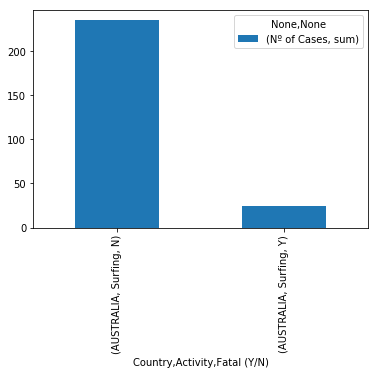

In [49]:
%matplotlib inline
Analysis.plot.bar()